### 모델 개요

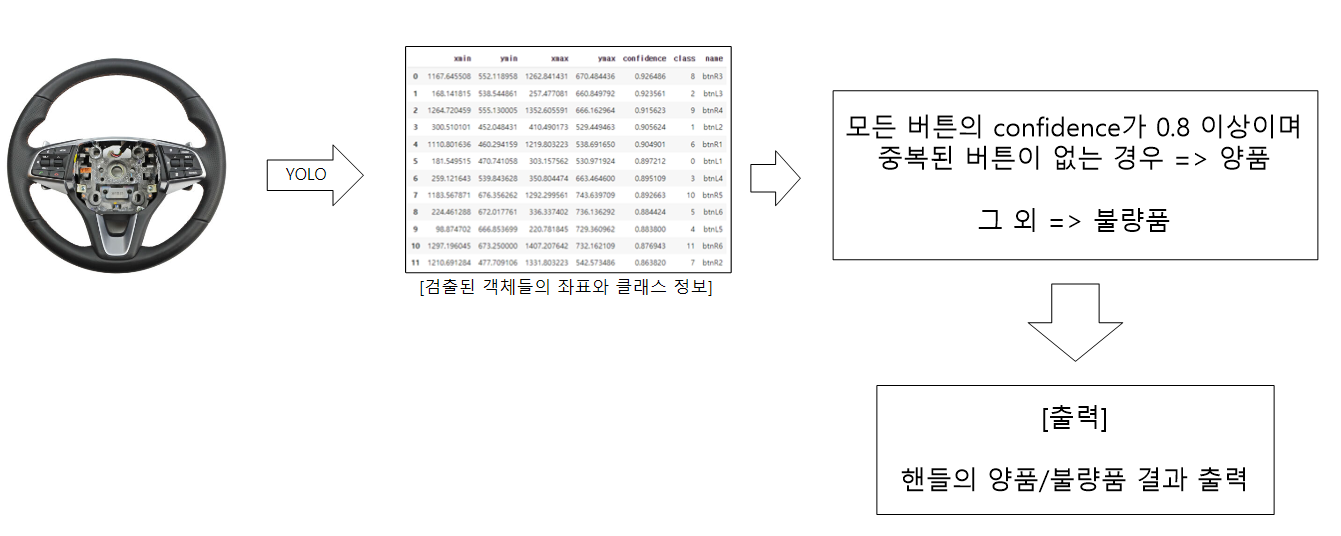

1. 핸들의 전체이미지를 YOLO의 인풋 이미지로 사용
2. YOLO의 결과를 바탕으로 confidence값과 class name을 이용하여 핸들의 양품/불량품을 판별

# 결과

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import torch
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 원본 이미지에 바운딩 박스를 그려서 출력해주는 함수
def plot_boxes(results, frame):
    # results : [xmin, ymin, xmax, ymax, conf, clsss, name] 으로 구성된 욜로의 출력
    # frame : 욜로에 입력으로 사용한 이미지

    # colors : 바운딩박스 색(size = (2, channel))
    colors = [
                (255, 0, 0), # Blue : Normal
                (0, 0, 255)  # Red : Abnormal
              ]

    for i in range(len(results)):
        # results에서 맨 위에서 부터 사용하며, 해당 행을 row에 저장하여 사용
        row = results.loc[i, :].values.tolist()

        x1, y1, x2, y2 = int(row[0]), int(row[1]), int(row[2]), int(row[3])

        # confidence 값이 0.8 이상인 경우 정상 버튼으로 판단하며 파란색 바운딩 박스를 그림
        if row[4] >= 0.80:
            color = colors[0]

        # confidence 값이 0.3 이상 0.8 미만인 경우 비정상 버튼으로 판단하며 빨간색 바운딩 박스를 그림
        elif row[4] >= 0.3:
            color = colors[1]

        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)

    cv2_imshow(cv2.resize(frame, [896, 640]))
    return 

In [ ]:
# yolo weight 저장 경로
weight_path = '/content/drive/MyDrive/DSBA_최종프로젝트_1조/최종_프로젝트/result/best_v5.pt'

model = torch.hub.load("ultralytics/yolov5", "custom", path=weight_path, force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-11-4 Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 157 layers, 7042489 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
img = cv2.imread('/content/drive/MyDrive/DSBA_최종프로젝트_1조/최종_프로젝트/test_images/abnormal2.jpg')

# yolo에 img를 인폿으로 입력한 결과를 results 변수에 저장
results = model(img, size=640)

In [ ]:
# results를 pandas dataframe으로 변환한 후 중복검출된 결과를 삭제
result_df = pd.DataFrame(results.pandas().xyxy[-1])
result_df = result_df.drop_duplicates(['name'], keep='first')

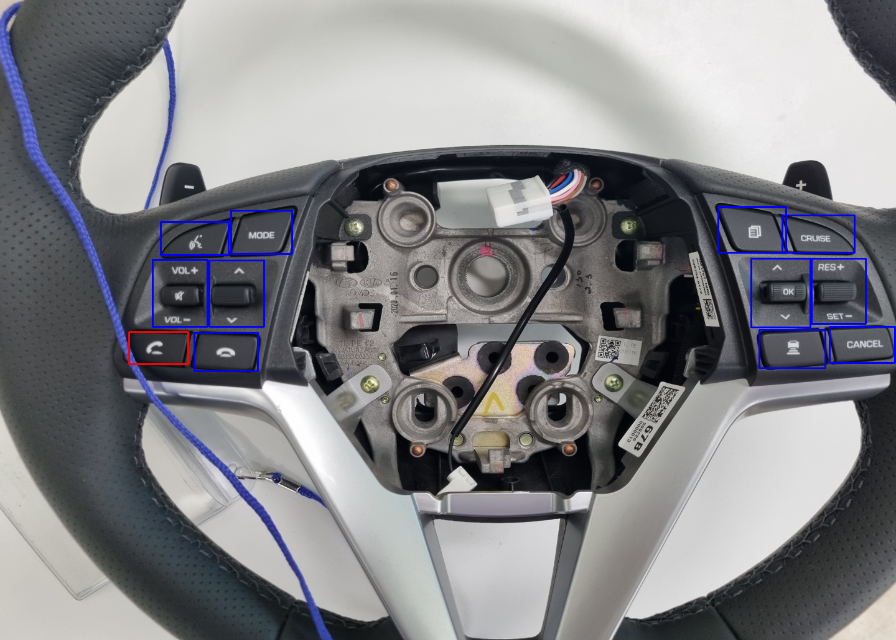

In [ ]:
# 검출 결과
plot_boxes(result_df, img.copy())